In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
# gpuid = 0 # An index of which gpu to use. 
# os.environ['KERAS_BACKEND'] = 'tensorflow'
# os.environ['CUDA_VISIBLE_DEVICES'] = "{}".format(gpuid) # (Empty) List of gpu indices that TF can see.
from keras import backend as K
import keras
import tensorflow as tf
from tensorflow.keras.models import load_model

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.regularizers import l2
import load_images

In [2]:
#loading data
X_train, Y_train, X_validation, Y_validation, X_test, Y_test = load_images.getRGBDataset()

In [35]:
base_model = tf.keras.applications.ResNet50V2(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(48, 48, 3),
    include_top=False)
# print(len(base_model.layers)) # 190 layers
# only freeze 0-178 layers
# for layer in base_model.layers[:152]:
#     layer.trainable = False

for i,layer in enumerate(base_model.layers):
    print(i,layer.name,'-',layer.trainable)

0 input_6 - True
1 conv1_pad - True
2 conv1_conv - True
3 pool1_pad - True
4 pool1_pool - True
5 conv2_block1_preact_bn - True
6 conv2_block1_preact_relu - True
7 conv2_block1_1_conv - True
8 conv2_block1_1_bn - True
9 conv2_block1_1_relu - True
10 conv2_block1_2_pad - True
11 conv2_block1_2_conv - True
12 conv2_block1_2_bn - True
13 conv2_block1_2_relu - True
14 conv2_block1_0_conv - True
15 conv2_block1_3_conv - True
16 conv2_block1_out - True
17 conv2_block2_preact_bn - True
18 conv2_block2_preact_relu - True
19 conv2_block2_1_conv - True
20 conv2_block2_1_bn - True
21 conv2_block2_1_relu - True
22 conv2_block2_2_pad - True
23 conv2_block2_2_conv - True
24 conv2_block2_2_bn - True
25 conv2_block2_2_relu - True
26 conv2_block2_3_conv - True
27 conv2_block2_out - True
28 conv2_block3_preact_bn - True
29 conv2_block3_preact_relu - True
30 conv2_block3_1_conv - True
31 conv2_block3_1_bn - True
32 conv2_block3_1_relu - True
33 conv2_block3_2_pad - True
34 conv2_block3_2_conv - True
35 co

In [36]:
model = Sequential()
model.add(base_model)

model.add(Flatten())
model.add(BatchNormalization())

model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Dense(64,activation="relu"))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Dense(7, activation="softmax"))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2, 2, 2048)        23564800  
                                                                 
 flatten_5 (Flatten)         (None, 8192)              0         
                                                                 
 batch_normalization_23 (Bat  (None, 8192)             32768     
 chNormalization)                                                
                                                                 
 dense_23 (Dense)            (None, 1024)              8389632   
                                                                 
 dropout_18 (Dropout)        (None, 1024)              0         
                                                                 
 batch_normalization_24 (Bat  (None, 1024)             4096      
 chNormalization)                                     

In [49]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
    optimizer= Adam(learning_rate=0.00000001), 
    metrics=['accuracy']
)
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = 'models/resnet_CNN_model', 
        save_freq = 'epoch' ,
        save_best_only = True,
        monitor = 'val_accuracy',
        mode ='max'
    )
]


In [50]:
history = model.fit(X_train, Y_train,batch_size= 512,
                    epochs=20,verbose=1, validation_data=(X_validation, Y_validation),callbacks = callbacks)

Epoch 1/20
85/85 [==============================] - ETA: 0s - loss: 0.6232 - accuracy: 0.7992 

INFO:tensorflow:Assets written to: models\resnet_CNN_model\assets


INFO:tensorflow:Assets written to: models\resnet_CNN_model\assets


85/85 [==============================] - 1353s 16s/step - loss: 0.6232 - accuracy: 0.7992 - val_loss: 1.3039 - val_accuracy: 0.5518
Epoch 2/20
85/85 [==============================] - 1465s 17s/step - loss: 0.6243 - accuracy: 0.7983 - val_loss: 1.3133 - val_accuracy: 0.5518
Epoch 3/20
85/85 [==============================] - 1979s 23s/step - loss: 0.6229 - accuracy: 0.7975 - val_loss: 1.3087 - val_accuracy: 0.5516
Epoch 4/20
85/85 [==============================] - 2119s 25s/step - loss: 0.6232 - accuracy: 0.7977 - val_loss: 1.3087 - val_accuracy: 0.5516
Epoch 5/20
85/85 [==============================] - ETA: 0s - loss: 0.6250 - accuracy: 0.7976 

INFO:tensorflow:Assets written to: models\resnet_CNN_model\assets


INFO:tensorflow:Assets written to: models\resnet_CNN_model\assets


85/85 [==============================] - 2135s 25s/step - loss: 0.6250 - accuracy: 0.7976 - val_loss: 1.3088 - val_accuracy: 0.5522
Epoch 6/20
85/85 [==============================] - 2152s 25s/step - loss: 0.6202 - accuracy: 0.7993 - val_loss: 1.3078 - val_accuracy: 0.5519
Epoch 7/20
85/85 [==============================] - ETA: 0s - loss: 0.6201 - accuracy: 0.7983 

INFO:tensorflow:Assets written to: models\resnet_CNN_model\assets


INFO:tensorflow:Assets written to: models\resnet_CNN_model\assets


85/85 [==============================] - 2160s 25s/step - loss: 0.6201 - accuracy: 0.7983 - val_loss: 1.3092 - val_accuracy: 0.5527
Epoch 8/20
85/85 [==============================] - 2133s 25s/step - loss: 0.6224 - accuracy: 0.7979 - val_loss: 1.3089 - val_accuracy: 0.5513
Epoch 9/20
85/85 [==============================] - 2150s 25s/step - loss: 0.6234 - accuracy: 0.7988 - val_loss: 1.3107 - val_accuracy: 0.5512
Epoch 10/20
85/85 [==============================] - 2148s 25s/step - loss: 0.6192 - accuracy: 0.8006 - val_loss: 1.3062 - val_accuracy: 0.5518
Epoch 11/20
85/85 [==============================] - 2042s 24s/step - loss: 0.6231 - accuracy: 0.7975 - val_loss: 1.3075 - val_accuracy: 0.5509
Epoch 12/20
85/85 [==============================] - 1537s 18s/step - loss: 0.6224 - accuracy: 0.7956 - val_loss: 1.3060 - val_accuracy: 0.5518
Epoch 13/20
85/85 [==============================] - 1472s 17s/step - loss: 0.6204 - accuracy: 0.8000 - val_loss: 1.3066 - val_accuracy: 0.5516
Epoch 

KeyboardInterrupt: 

In [51]:
# best model prediction on test data
del(model)
model = load_model('models/resnet_CNN_model')
prediction = model.predict(X_test) # for each datapoint, gives a (1,7) vector contains probabilities

225/225 [==============================] - 112s 492ms/step


In [52]:
Y_prediction = np.argmax(prediction,axis = 1) # get the index(label) of highest probability for each testing datapoint
prediction_accuracy = np.mean(Y_prediction==Y_test)
print("The accuracy on test data is: ", prediction_accuracy)

The accuracy on test data is:  0.5388687656728894


In [58]:
from sklearn.metrics import confusion_matrix, roc_auc_score,ConfusionMatrixDisplay

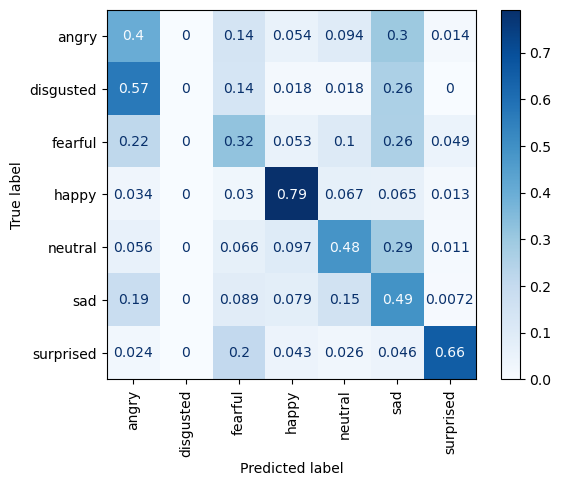

In [70]:
# confusion matrix
classes = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
cm = confusion_matrix(Y_test, Y_prediction, normalize= 'true')
disp = ConfusionMatrixDisplay(cm, display_labels = classes)
disp.plot(xticks_rotation = 'vertical',cmap=plt.cm.Blues)